### Problem Statement:- To build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk

In [3]:
df_train=pd.read_csv('C:/Users/hp/Downloads/Malignant-Comments-Classifier-Project/Malignant Comments Classifier Project/train.csv')

In [4]:
df_train.head(25)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
df_train.tail(25)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0
159547,ffb7b4c3d3ae5842,"Thank you very, very much. ·✆",0,0,0,0,0,0
159548,ffb93b0a0a1e78f9,Talkback: 15 September 2012,0,0,0,0,0,0
159549,ffb998f9749bd83e,"2005 (UTC)\n 06:35, 31 Mar",0,0,0,0,0,0
159550,ffba5332d6b8fd14,i agree/ on another note lil wayne is a talent...,0,0,0,0,0,0
159551,ffbc2db4225258dd,While about half the references are from BYU-I...,0,0,0,0,0,0
159552,ffbcd64a71775e04,Prague Spring \n\nI think that Prague Spring d...,0,0,0,0,0,0
159553,ffbd331a3aa269b9,I see this as having been merged; undoing one ...,0,0,0,0,0,0
159554,ffbdbb0483ed0841,and i'm going to keep posting the stuff u dele...,1,0,1,0,1,0
159555,ffc2f409658571f1,"""\n\nHow come when you download that MP3 it's ...",0,0,0,0,0,0


In [6]:
df_train.shape

(159571, 8)

Observation- The dataset contains 159571 rows and 8 columns

In [7]:
df_train.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [8]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

Observation:- There are no null values in the dataset

In [9]:
### Now lets check the test dataset provided to us

In [10]:
df_test=pd.read_csv('C:/Users/hp/Downloads/Malignant-Comments-Classifier-Project/Malignant Comments Classifier Project/test.csv')

In [11]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [12]:
## Now lets analyse the dataset in more details

In [13]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Convert all the data in a particular case. I have converted all in lower case
df_train['comment_text'] = df_train.comment_text.str.lower()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


In [15]:
df_test['comment_text'] = df_test.comment_text.str.lower()
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...
1,0000247867823ef7,== from rfc == \n\n the title is fine as it is...
2,00013b17ad220c46,""" \n\n == sources == \n\n * zawe ashton on lap..."
3,00017563c3f7919a,":if you have a look back at the source, the in..."
4,00017695ad8997eb,i don't anonymously edit articles at all.


In [16]:
#Lets remove all the special characters in the comments
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email')

df_train['comment_text'] = df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-z]{2,3}(/\s*)?$', 'URL')

df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

df_train['comment_text'] = df_train['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [17]:
#Lets remove all the special characters in the comments
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-z]{2,3}(/\s*)?$', 'URL')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [18]:
#Also i have replaced extra white space 
df_train['comment_text'] = df_train['comment_text'].str.replace(r'[^\w\d\s]',' ')

df_train['comment_text'] = df_train['comment_text'].str.replace(r'\s+',' ')

df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\s+|\s+?$', ' ')

In [19]:
#Also i have replaced extra white space 
df_test['comment_text'] = df_test['comment_text'].str.replace(r'[^\w\d\s]',' ')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'\s+',' ')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+|\s+?$', ' ')

In [20]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [21]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the inf...
4,00017695ad8997eb,i don t anonymously edit articles at all


malignant


0    144277
1     15294
Name: malignant, dtype: int64


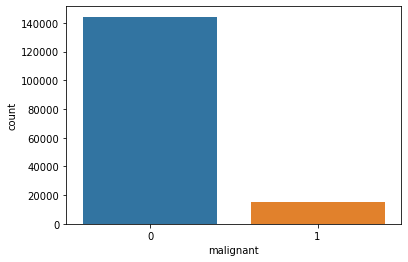

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


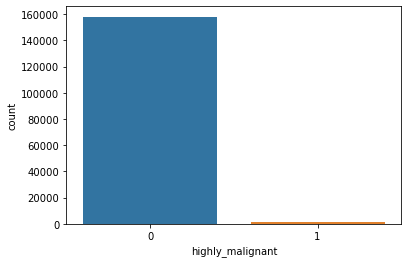

loathe


0    158166
1      1405
Name: loathe, dtype: int64


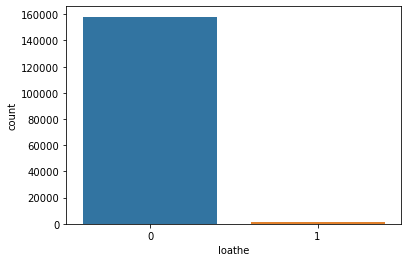

rude


0    151122
1      8449
Name: rude, dtype: int64


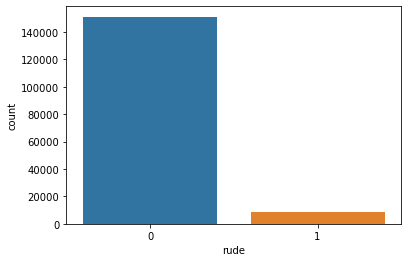

abuse


0    151694
1      7877
Name: abuse, dtype: int64


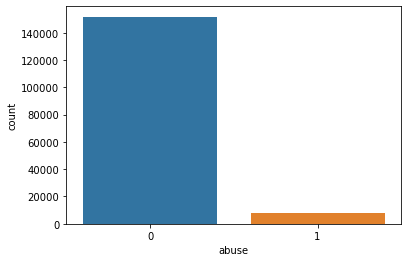

threat


0    159093
1       478
Name: threat, dtype: int64


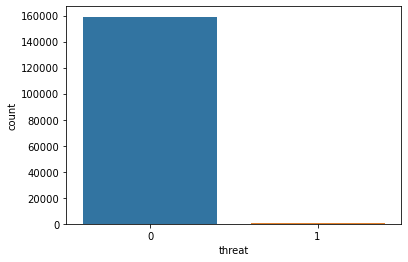

In [22]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

In [23]:
#New column for length of comment
df_train['length']=df_train.comment_text.str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,262
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0,117
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,230
3,0001b41b1c6bb37e,more i can t make any real suggestions on imp...,0,0,0,0,0,0,603
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,64


In [24]:
#remove stopwords
import string
##import nltk
##nltk.download()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_train['comment_text']=df_train['comment_text'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [25]:
df_train['clean_length']=df_train.comment_text.str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,262,172
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,117,97
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,230,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,603,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,64,29


In [26]:
#Total length removal
print('Original Length',df_train.length.sum())
print('Clean Length',df_train.clean_length.sum())

Original Length 60910443
Clean Length 40716148


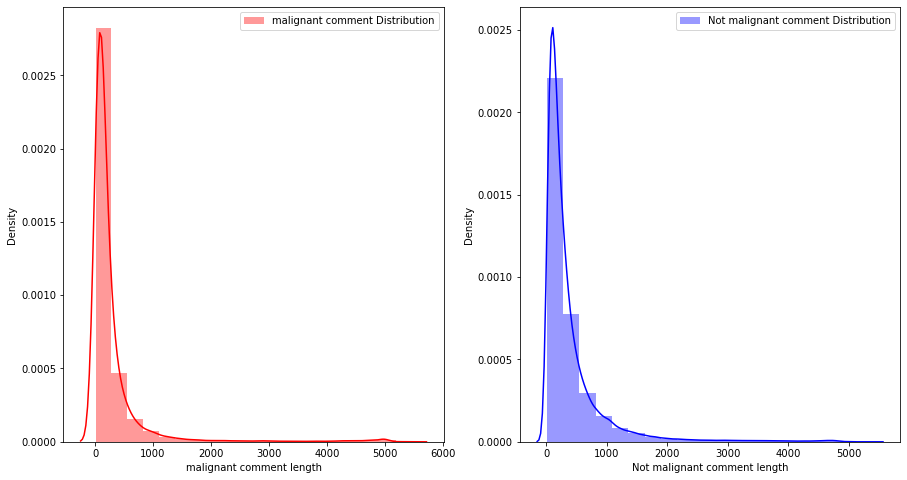

In [27]:
#comment distribution Before cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_train[df_train['malignant']==1]['length'],bins=20,ax=ax[0],label='malignant comment Distribution',color='r')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()
sns.distplot(df_train[df_train['malignant']==0]['length'],bins=20,ax=ax[1],label='Not malignant comment Distribution',color='b')
ax[1].set_xlabel('Not malignant comment length')
ax[1].legend()
plt.show()

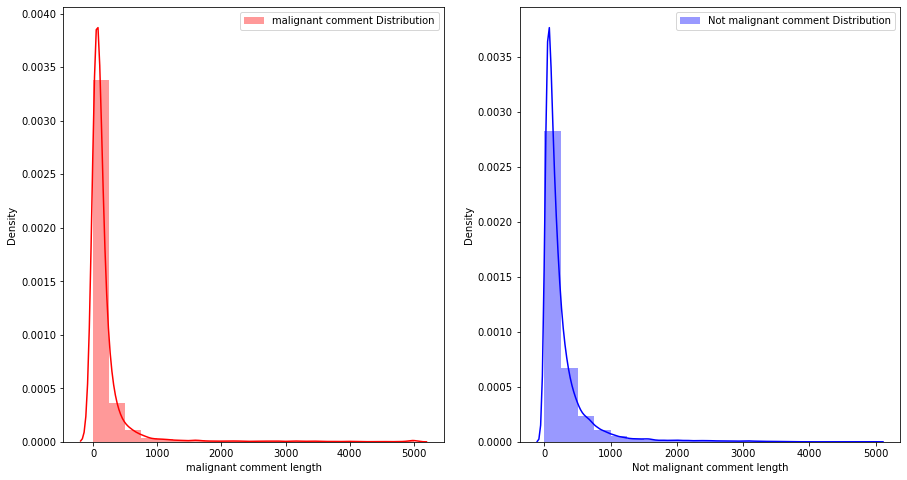

In [28]:
#comment distribution After cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_train[df_train['malignant']==1]['clean_length'],bins=20,ax=ax[0],label='malignant comment Distribution',color='r')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()
sns.distplot(df_train[df_train['malignant']==0]['clean_length'],bins=20,ax=ax[1],label='Not malignant comment Distribution',color='b')
ax[1].set_xlabel('Not malignant comment length')
ax[1].legend()
plt.show()

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


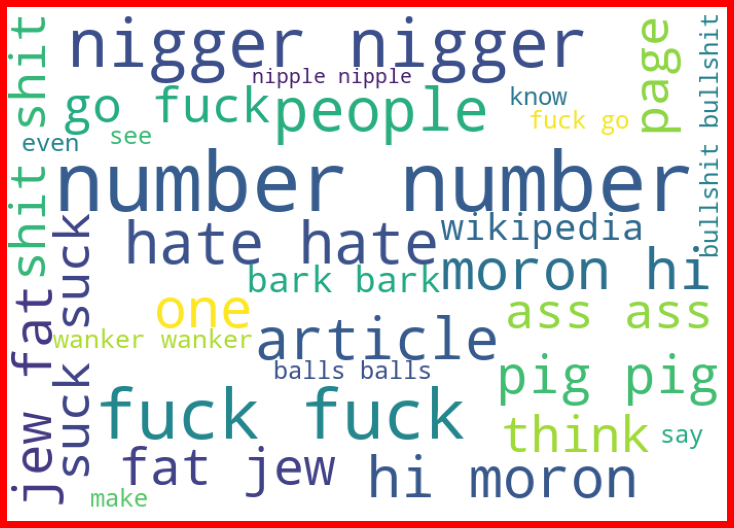

In [30]:
#getting sense of loud word in malignant
from wordcloud import WordCloud

malignant=df_train['comment_text'][df_train['malignant']==1]

malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

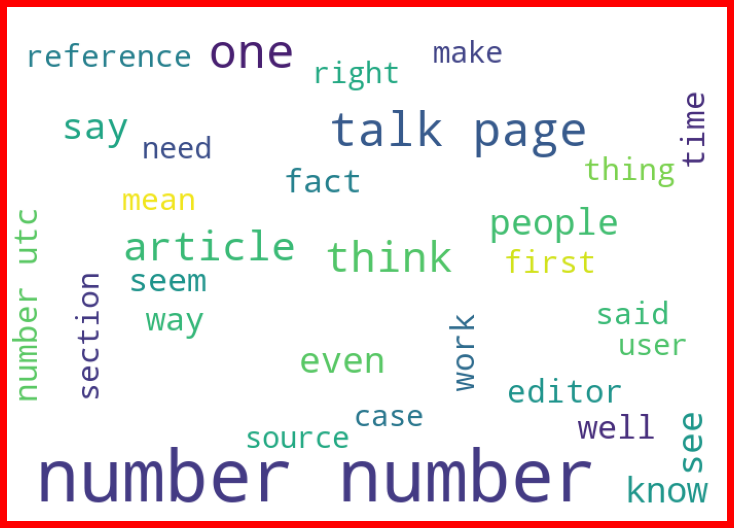

In [31]:
#getting sense of loud word in Not malignant
from wordcloud import WordCloud

not_malignant=df_train['comment_text'][df_train['malignant']==0]

not_malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(not_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

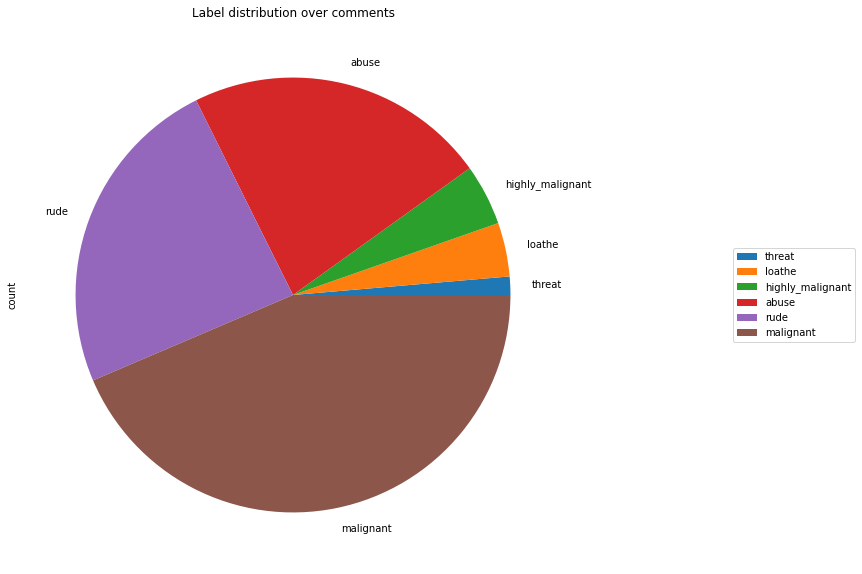

In [32]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution =df_train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [33]:
target_data = df_train[cols_target]

df_train['bad'] =df_train[cols_target].sum(axis =1)
print(df_train['bad'].value_counts())
df_train['bad'] = df_train['bad'] > 0 
df_train['bad'] = df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
#Prediction - Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [35]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x = features

In [36]:
df_train.shape

(159571, 11)

In [37]:
df_test.shape

(153164, 2)

In [38]:
y=df_train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [39]:
x_train.shape, y_train.shape, x_test.shape

((111699, 10000), (111699,), (47872, 10000))

In [40]:
y_test.shape

(47872,)

In [41]:
Model=[]
score=[]
cvs=[]
rocscore=[]

KNeighborsClassifier(n_neighbors=6)
Accuracy_score=  0.9188043114973262
Cross_val_score= 0.9190579759085622
roc_auc_score=  0.6180020756868854
classification_report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.24      0.38      4922

    accuracy                           0.92     47872
   macro avg       0.91      0.62      0.67     47872
weighted avg       0.92      0.92      0.90     47872
 

Confusion Matrix
 [[42807   143]
 [ 3744  1178]] 






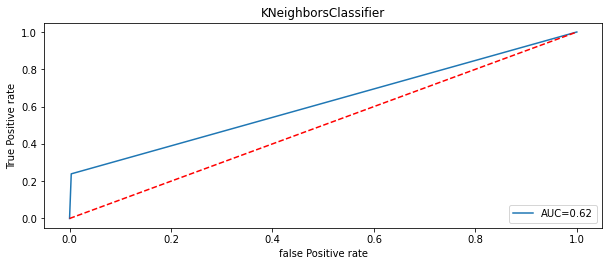

In [42]:
KNN=KNeighborsClassifier(n_neighbors=6)
Model.append('KNeighborsClassifier')
KNN.fit(x_train,y_train)
print(KNN)
pre=KNN.predict(x_test)
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(KNN,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc)
cvs.append(sc*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc)
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('KNeighborsClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [ ]:
SV=SVC()
Model.append('SVC')
SV.fit(x_train,y_train)
print(SV)
pre=SV.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(SV,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('SVC')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [ ]:
LR=LogisticRegression()
Model.append('LogisticRegression')
LR.fit(x_train,y_train)
print(LR)
pre=LR.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
#print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('LogisticRegression')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [ ]:
DT=DecisionTreeClassifier(random_state=6)
Model.append('DecisionTreeClassifier')
DT.fit(x_train,y_train)
print(DT)
pre=DT.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DT,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('DecisionTreeClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [ ]:
#GNB=GaussianNB()
native =MultinomialNB()
Model.append('MultinomialNB')
native.fit(x_train,y_train)
print(native)
pre=native.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(native,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(native)
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')


In [ ]:
RFC=RandomForestClassifier(n_estimators=1000,random_state=0)
Model.append('RandomForestClassifier')
RFC.fit(x_train,y_train)
print(RFC)
pre=RFC.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(RFC,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('RandomForestClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier(n_estimators=100)
Model.append('AdaBoostClassifier')
ada.fit(x_train,y_train)
print(ada)
pre=ada.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DT,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pre),'\n')
cm=confusion_matrix(y_test,pre)
print('Confusion Matrix\n',cm,'\n')
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('AdaBoostClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [ ]:
a={'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore}
result=pd.DataFrame.from_dict(a, orient='index')
result=result.T

In [ ]:
result

In [ ]:
#from sklearn.externals 
import joblib
joblib.dump(RFC,'Malignant_Comment_Classifier_Model.pkl')

In [ ]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

In [ ]:
prediction=RFC.predict(test_data)
prediction

In [ ]:
model=joblib.load('Malignant_Comment_Classifier_Model.pkl')

In [ ]:
result1=pd.DataFrame(model.predict(test_data))

In [ ]:
result1.to_csv('Malignant_Comment_Classifier_Model_prdictresults.csv')